In [35]:
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("C:\\Users\\Joanna Kang\\Documents\\GitHub\\Sales-dashboard\\My First Project-c1aa474eca74.json")
project_id = 'rare-shuttle-279916'

In [36]:
client = bigquery.Client()

In [37]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [38]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1

credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

# Make clients.
bqclient = bigquery.Client(
    credentials=credentials,
    project= 'rare-shuttle-279916',
)
bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
    credentials=credentials
)

In [39]:
query_job_1 = client.query('''SELECT * FROM `rare-shuttle-279916.Amazon.productlist_200625` LIMIT 20000
''')
productlist = query_job_1.to_dataframe()

In [40]:
def column_replace(productlist, columns, new_column):
    productlist_before = []
    productlist_new = new_column
    for i in range(len(columns)):
        productlist_before.append(columns[i])

    for i in range(len(new_column)):
        productlist_new.append(new_column[i])

    for i in range(len(productlist_before)):
        productlist = productlist.rename({productlist_before[i] : productlist_new[i]}, axis = 'columns')
    
    productlist = productlist.drop([productlist.index[0]])

    return productlist

productlist = column_replace(productlist, productlist.columns, ['Batch', 'SKU', 'ASIN', 'BARCODE', 'NAME(KR)', 'SKU_2', 'ASIN_2', 'CHARACTER', 'CATEGORY', 'ITEM', 'THEME', 'PRODUCT_NAME(KR)'])

#productlist = productlist.drop([productlist.index[0]])
productlist = productlist.sort_values(by='Batch')

In [41]:
productlist = productlist.drop_duplicates('SKU', keep='last')

In [42]:
productlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 445 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Batch             906 non-null    object
 1   SKU               906 non-null    object
 2   ASIN              708 non-null    object
 3   BARCODE           906 non-null    object
 4   NAME(KR)          906 non-null    object
 5   SKU_2             906 non-null    object
 6   ASIN_2            705 non-null    object
 7   CHARACTER         906 non-null    object
 8   CATEGORY          906 non-null    object
 9   ITEM              906 non-null    object
 10  THEME             906 non-null    object
 11  PRODUCT_NAME(KR)  906 non-null    object
dtypes: object(12)
memory usage: 92.0+ KB


In [43]:
julysale = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\sales_2020-06-01_2020-07-05.csv")

In [44]:
julysale.columns.values[1] = 'SKU'

In [45]:
julysale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_title  2060 non-null   object 
 1   SKU            2060 non-null   object 
 2   day            2060 non-null   object 
 3   net_quantity   2060 non-null   int64  
 4   gross_sales    2060 non-null   float64
 5   discounts      2060 non-null   float64
 6   returns        2060 non-null   float64
 7   net_sales      2060 non-null   float64
 8   taxes          2060 non-null   float64
 9   total_sales    2060 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 161.1+ KB


In [46]:
julysale = pd.merge(julysale, productlist, how = 'left', on = 'SKU')

In [47]:
julysale

,product_title,SKU,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,...,ASIN,BARCODE,NAME(KR),SKU_2,ASIN_2,CHARACTER,CATEGORY,ITEM,THEME,PRODUCT_NAME(KR)
0,Portable Fan with Cradle Stand - Ryan,F08846,2020-06-25,5,133.27,-21.30,0.00,111.97,22.40,134.37,...,B07RZ1FSN7,8809641467386,크레들 핸디형 선풍기_라이언,F08846,B07RZ1FSN7,Ryan,Home,Fans,Basic,크레들 핸디형 선풍기_라이언
1,"Yumyum Friends, Tote bag - Little Ryan",F10931,2020-06-05,5,114.95,-3.43,0.00,111.52,0.00,111.52,...,None,8809681708968,얌얌 에코백_리틀라이언,F10931,None,Ryan,Accessories,Canvas bag,Lemon Terras,얌얌 에코백_리틀라이언
2,"Baby Dreaming Theme, Mini Pillow - Little Ryan",F10671,2020-06-15,4,69.95,-13.97,-11.19,44.79,0.00,44.79,...,B086MQ57RX,8809681706742,베이비드리밍 타이니프렌즈_라이언,F10671,B086MQ57RX,Ryan,Plush,Mini Pillow,Baby Dreaming,베이비드리밍 타이니프렌즈_라이언
3,"Happy Weeks, Removable Stickers - Apeach",F10751,2020-07-03,4,17.05,-5.11,0.00,11.94,2.03,13.97,...,B084JSM6YB,8809681707459,해피위크 리무버블스티커_어피치,F10751,B084JSM6YB,Apeach,Stationery,Stickers,Happy Weeks,해피위크 리무버블스티커_어피치
4,Silicone Mood Lamp - Little Apeach,F09049,2020-06-12,4,103.56,0.00,0.00,103.56,0.00,103.56,...,None,8809656134594,실리콘무드등_리틀어피치,36,None,Apeach,Home,Mood Lamp,Little Friends,실리콘무드등_리틀어피치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,"Baby Dreaming Theme, Mini Pillow - Little Ryan",F10671,2020-06-12,-1,0.00,0.00,-13.99,-13.99,0.00,-13.99,...,B086MQ57RX,8809681706742,베이비드리밍 타이니프렌즈_라이언,F10671,B086MQ57RX,Ryan,Plush,Mini Pillow,Baby Dreaming,베이비드리밍 타이니프렌즈_라이언
2056,Keyring for AirPods cases - Little Ryan,F09703,2020-06-09,-1,0.00,0.00,-8.49,-8.49,0.00,-8.49,...,B07S1WNM35,8809656137403,에어팟키링-리틀라이언,F09703,B07S1WNM35,Ryan,Tech&Accs,Airpods Keyring,Little Friends,에어팟키링-리틀라이언
2057,"Skateboard Cotton Face Socks - Ryan, Heel",93009450,2020-06-16,-2,0.00,0.00,-6.48,-6.48,0.00,-6.48,...,B07RYN2GKC,8809656137113,라인보드삭스-라이언,93009450,B07RYN2GKC,Ryan,Accessories,Socks,Basic,라인보드삭스-라이언
2058,Mini Pillow - Lovely Ryan,F09923,2020-06-22,-2,0.00,0.00,-24.00,-24.00,0.00,-24.00,...,None,8809641469113,베이비필로우_러블리라이언,50,None,Ryan,Plush,Mini Pillow,Lovely Ryan,베이비필로우_러블리라이언


In [48]:
julysale['day'] = pd.to_datetime(julysale['day'])

In [49]:
julysale['dayofweek'] = julysale['day'].dt.week
#sale['sale_month'] = sale['purchase-date'].dt.month


In [50]:
julysale

,product_title,SKU,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,...,BARCODE,NAME(KR),SKU_2,ASIN_2,CHARACTER,CATEGORY,ITEM,THEME,PRODUCT_NAME(KR),dayofweek
0,Portable Fan with Cradle Stand - Ryan,F08846,2020-06-25,5,133.27,-21.30,0.00,111.97,22.40,134.37,...,8809641467386,크레들 핸디형 선풍기_라이언,F08846,B07RZ1FSN7,Ryan,Home,Fans,Basic,크레들 핸디형 선풍기_라이언,26
1,"Yumyum Friends, Tote bag - Little Ryan",F10931,2020-06-05,5,114.95,-3.43,0.00,111.52,0.00,111.52,...,8809681708968,얌얌 에코백_리틀라이언,F10931,None,Ryan,Accessories,Canvas bag,Lemon Terras,얌얌 에코백_리틀라이언,23
2,"Baby Dreaming Theme, Mini Pillow - Little Ryan",F10671,2020-06-15,4,69.95,-13.97,-11.19,44.79,0.00,44.79,...,8809681706742,베이비드리밍 타이니프렌즈_라이언,F10671,B086MQ57RX,Ryan,Plush,Mini Pillow,Baby Dreaming,베이비드리밍 타이니프렌즈_라이언,25
3,"Happy Weeks, Removable Stickers - Apeach",F10751,2020-07-03,4,17.05,-5.11,0.00,11.94,2.03,13.97,...,8809681707459,해피위크 리무버블스티커_어피치,F10751,B084JSM6YB,Apeach,Stationery,Stickers,Happy Weeks,해피위크 리무버블스티커_어피치,27
4,Silicone Mood Lamp - Little Apeach,F09049,2020-06-12,4,103.56,0.00,0.00,103.56,0.00,103.56,...,8809656134594,실리콘무드등_리틀어피치,36,None,Apeach,Home,Mood Lamp,Little Friends,실리콘무드등_리틀어피치,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,"Baby Dreaming Theme, Mini Pillow - Little Ryan",F10671,2020-06-12,-1,0.00,0.00,-13.99,-13.99,0.00,-13.99,...,8809681706742,베이비드리밍 타이니프렌즈_라이언,F10671,B086MQ57RX,Ryan,Plush,Mini Pillow,Baby Dreaming,베이비드리밍 타이니프렌즈_라이언,24
2056,Keyring for AirPods cases - Little Ryan,F09703,2020-06-09,-1,0.00,0.00,-8.49,-8.49,0.00,-8.49,...,8809656137403,에어팟키링-리틀라이언,F09703,B07S1WNM35,Ryan,Tech&Accs,Airpods Keyring,Little Friends,에어팟키링-리틀라이언,24
2057,"Skateboard Cotton Face Socks - Ryan, Heel",93009450,2020-06-16,-2,0.00,0.00,-6.48,-6.48,0.00,-6.48,...,8809656137113,라인보드삭스-라이언,93009450,B07RYN2GKC,Ryan,Accessories,Socks,Basic,라인보드삭스-라이언,25
2058,Mini Pillow - Lovely Ryan,F09923,2020-06-22,-2,0.00,0.00,-24.00,-24.00,0.00,-24.00,...,8809641469113,베이비필로우_러블리라이언,50,None,Ryan,Plush,Mini Pillow,Lovely Ryan,베이비필로우_러블리라이언,26


In [81]:
julysale.loc[julysale['CATEGORY'] == 'Stationeries', 'CATEGORY'] = 'Stationery'
julysale.loc[julysale['CHARACTER'] == 'All', 'CHARACTER'] = 'Together'

In [52]:
#각 주차 별 동일한 기준인지 체크
weekcheck = julysale[['day','dayofweek']]
weekcheck = weekcheck.drop_duplicates()
weekcheck['dayofweek'].value_counts()

27    7
26    7
25    7
24    7
23    7
Name: dayofweek, dtype: int64

In [53]:
theme_sale = pd.pivot_table(julysale,index = 'THEME', columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [54]:
theme_sale =  theme_sale.sort_values(by = 27, ascending = False)

In [55]:
theme_sale

dayofweek,23,24,25,26,27,All
THEME,,,,,,
All,411,401,602,384,489,2287
Little Friends,87,112,125,82,97,503
Basic,61,88,90,57,82,378
Happy Weeks,46,27,70,59,78,280
Baby Dreaming,36,21,69,50,55,231
Kang Daniel,15,8,31,4,50,108
Lemon Terras,42,21,75,44,39,221
Lovely Apeach,11,20,17,10,21,79
Yamyam Friends,30,17,24,24,15,110


In [56]:
category_overall = pd.pivot_table(julysale,index = ['CATEGORY'], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)
category_overall = category_overall.sort_values(by = 27, ascending=False)
category_overall

dayofweek,23,24,25,26,27,All
CATEGORY,,,,,,
All,411,401,602,384,489,2287
Stationery,48,84,120,77,120,449
Accessories,111,76,114,75,109,485
Plush,66,53,122,42,80,363
Tech&Accs,71,56,72,62,58,319
Living,55,45,75,55,47,277
Travel,9,11,15,8,22,65
Home,9,16,25,19,15,84
Bath,15,17,19,26,14,91


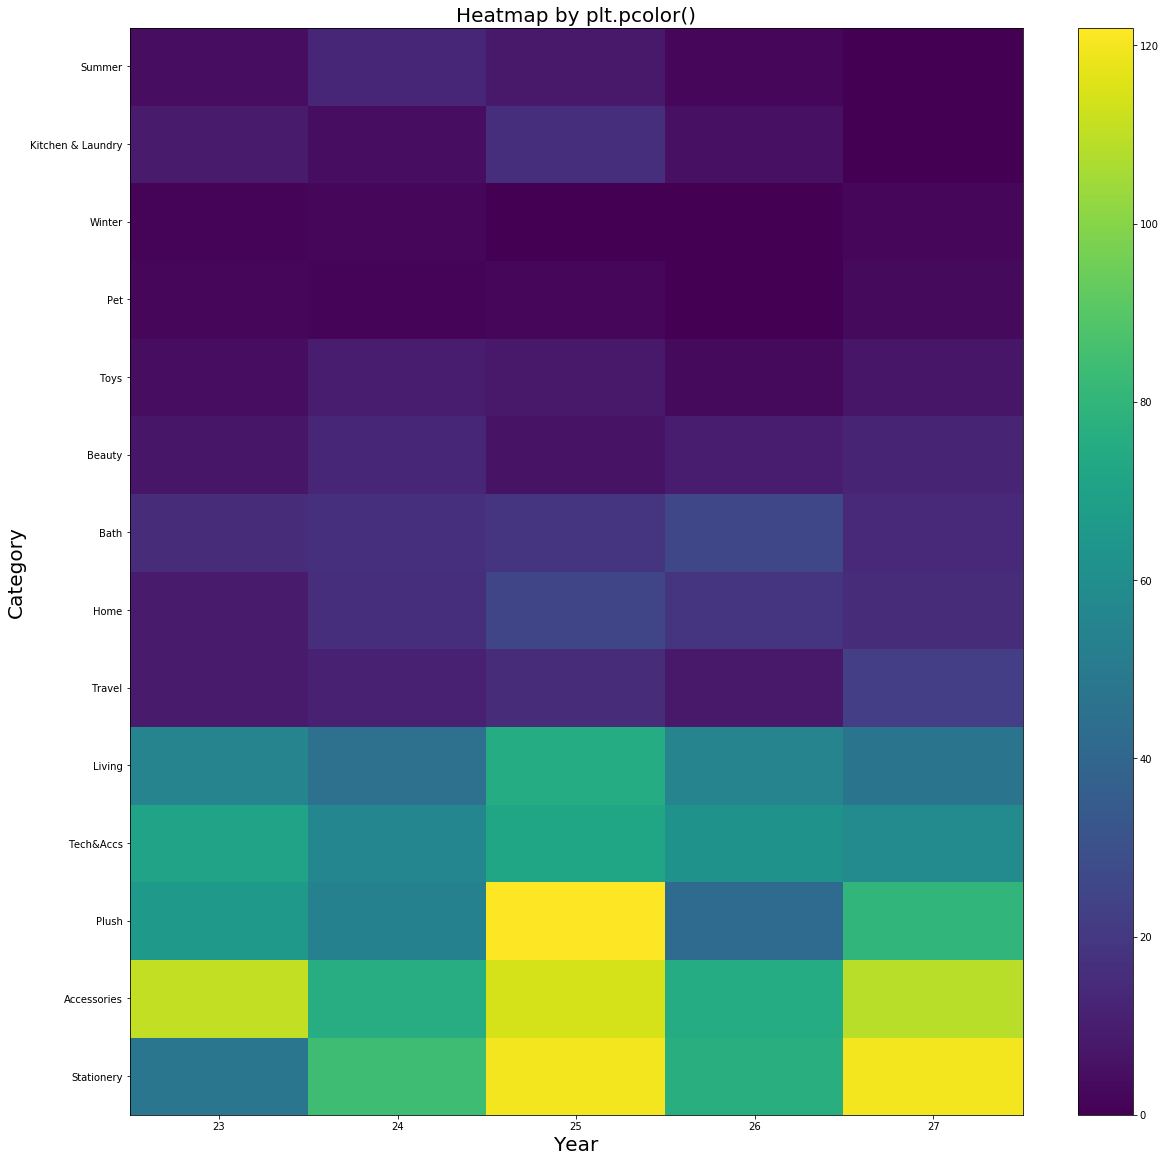

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 20]

category_overall.drop('All', axis = 'columns', inplace = True)
category_overall.drop('All', axis = 'index', inplace = True)

# heatmap by plt.pcolor()
def heatmap (chart, chartsize, font_size):
    plt.rcParams['figure.figsize'] = [chartsize, chartsize]
    plt.pcolor(chart)
    plt.xticks(np.arange(0.5, len(chart.columns), 1), chart.columns)
    plt.yticks(np.arange(0.5, len(chart.index), 1), chart.index)
    plt.title('Heatmap by plt.pcolor()', fontsize=font_size)
    plt.xlabel('Year', fontsize=font_size)
    plt.ylabel('Category', fontsize=font_size)
    plt.colorbar()

heatmap(category_overall, 20, 20)
#plt.savefig('sale_per_category.png')

In [115]:
category_sale = pd.pivot_table(julysale,index = ['CATEGORY', 'ITEM', 'NAME(KR)', 'product_title' ], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [117]:
category_sale  = category_sale.sort_values(by = 27, ascending = False)
category_sale

dayofweek                                                                                         23  \
CATEGORY    ITEM           NAME(KR)          product_title                                             
All                                                                                              411   
Plush       Body pillow    강다니엘에디션 바디필로우     KANGDANIEL EDITION, Body Pillow - Apeach              3   
            Mini Pillow    베이비드리밍 타이니프렌즈_라이언 Baby Dreaming Theme, Mini Pillow - Little Ryan        3   
Accessories Cross bag      강다니엘에디션 블랙후디(여성)  KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...    0   
Stationery  Message Cards  리틀스케치북_카드_생일축하    Cake Card - Apeach, Ryan, Frodo                       0   
...                                                                                              ...   
            Notepads       어텀스토리 라지스프링노트_라이언 Autumn Story Hardcover Ring Bound Notepad - Ryan     -1   
Accessories Canvas bag     레이지 미니에코백_리틀라이언   Lazy Sunday Mini Canvas Bag (Little Ryan)             4   
Plush       Mini Pillow    베이비드리밍 타이니프렌즈_무지  Baby Dreaming Theme, Mini Pillow - Little Muzi        1   
Beauty      Cosmetics Puff 러블리어피치 논라텍스퍼프     Mini Makeup Blender, Pack of 3 - Apeach               0   
Winter      Glove Mitts    엄지장갑 어피치          Faux Fur Gloves - Apeach                              0   

dayofweek                                                                                         24  \
CATEGORY    ITEM           NAME(KR)          product_title                                             
All                                                                                              401   
Plush       Body pillow    강다니엘에디션 바디필로우     KANGDANIEL EDITION, Body Pillow - Apeach              1   
            Mini Pillow    베이비드리밍 타이니프렌즈_라이언 Baby Dreaming Theme, Mini Pillow - Little Ryan        0   
Accessories Cross bag      강다니엘에디션 블랙후디(여성)  KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...    0   
Stationery  Message Cards  리틀스케치북_카드_생일축하    Cake Card - Apeach, Ryan, Frodo                       4   
...                                                                                              ...   
            Notepads       어텀스토리 라지스프링노트_라이언 Autumn Story Hardcover Ring Bound Notepad - Ryan      1   
Accessories Canvas bag     레이지 미니에코백_리틀라이언   Lazy Sunday Mini Canvas Bag (Little Ryan)             0   
Plush       Mini Pillow    베이비드리밍 타이니프렌즈_무지  Baby Dreaming Theme, Mini Pillow - Little Muzi        0   
Beauty      Cosmetics Puff 러블리어피치 논라텍스퍼프     Mini Makeup Blender, Pack of 3 - Apeach               1   
Winter      Glove Mitts    엄지장갑 어피치          Faux Fur Gloves - Apeach                              2   

dayofweek                                                                                         25  \
CATEGORY    ITEM           NAME(KR)          product_title                                             
All                                                                                              602   
Plush       Body pillow    강다니엘에디션 바디필로우     KANGDANIEL EDITION, Body Pillow - Apeach              2   
            Mini Pillow    베이비드리밍 타이니프렌즈_라이언 Baby Dreaming Theme, Mini Pillow - Little Ryan       11   
Accessories Cross bag      강다니엘에디션 블랙후디(여성)  KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...    1   
Stationery  Message Cards  리틀스케치북_카드_생일축하    Cake Card - Apeach, Ryan, Frodo                       4   
...                                                                                              ...   
            Notepads       어텀스토리 라지스프링노트_라이언 Autumn Story Hardcover Ring Bound Notepad - Ryan      0   
Accessories Canvas bag     레이지 미니에코백_리틀라이언   Lazy Sunday Mini Canvas Bag (Little Ryan)             3   
Plush       Mini Pillow    베이비드리밍 타이니프렌즈_무지  Baby Dreaming Theme, Mini Pillow - Little Muzi        4   
Beauty      Cosmetics Puff 러블리어피치 논라텍스퍼프     Mini Makeup Blender, Pack of 3 - Apeach               1   
Winter      Glove Mitts    엄지장갑 어피치          F

In [118]:
category_sale.query("CATEGORY == ['Accessories']").head(50)

Pouches         강다니엘에디션 데코포켓 파우치     KANGDANIEL EDITION - Pocket Pouch                    0   
            Hair Tie        폼폼프렌즈 헤어스트링_토끼어피치    Hair band, Pompom Friends - Rabbit Apeach            2   
            Keyrings        강다니엘에디션 투명키링_날아라냥이   KANGDANIEL EDITION, Acrylic Keyring - Flying Ap...   1   
                            강다니엘에디션 스트랩키링        KANGDANIEL EDITION- Strap Keyring                    1   
            Pouches         얌얌 파우치_리틀어피치         Yumyum Friends, Pouch - Little Apeach                1   
            Keyrings        강다니엘에디션 소프트키링_윙크어피치  KANGDANIEL EDITION, Plush Keyring - Wink Apeach      2   
            Card Wallets    베이직카드지갑 라이언          Basic Card Holder - Ryan                             0   
            Canvas bag      얌얌 미니 에코백_리틀라이언      Yumyum Friends, Mini Tote bag - Little Ryan          2   
            Hair Tie        폼폼프렌즈 헤어스트링_곰돌이라이언   Hair band, Pompom Friends - Polar Bear Ryan          1   
            Coin Wallets    치즈 동전지갑 라이언          Cheese Friends, Coin Wallet - Ryan                   0   
            Pouches         레이지 파우치_ivory        Lazy Sunday Pouch (Little Muzi)                      2   
            Pin badge       프렌즈뱃지_어피치블라썸         Metal Pin Badges - Peach Apeach                      2   
            Keyrings        타이니프렌즈_제이지           Keyring - Tiny Jay-G                                 1   
                            피규어키링-리본라이언          Keyring - Ryan (with Ribbon)                         0   
            Socks           프렌즈스토리삭스(여성)_레몬프렌즈   Low Cut Socks - Ryan & Apeach & Con                  0   
            Pouches         베이비드리밍 글리터파우치 리틀라이언  Baby Dreaming Theme, Glitter Pouch - Ryan            3   
            Socks           프렌즈스토리삭스(여성)_해피선데이   Low Cut Socks - Ryan & Apeach                        3   
                            프렌즈스토리삭스(여성)_방콕타임    Low Cut Socks - Ryan & Con                           0   
                            프렌즈스토리삭스(여성)_레몬트리    Low Cut Socks - Ryan & Con                           0   
                            프렌즈미디움삭스(공용)_해피토요일   Socks, Happy Saturday - Ryan & Con                   1   
                            프렌즈미디움삭스(공용)_보드라이언   Socks, Board - Ryan                                  1   
            Pouches         얌얌 파우치_리틀라이언         Yumyum Friends, Pouch - Little Ryan                  3   
            Pin badge       강다니엘에디션 핀뱃지세트(2p)    KANGDANIEL EDITION, Pin Badge - Apeach               2   
            Plush Keyring   허니프렌즈 미니키체인_튜브       Key Chain - Honey Bee Tube                           2   
            AirPods Keyring 하트어피치 에어팟키링          Metal Keyring - Heart Apeach                         1   
            Plush Keyring   폼폼프렌즈 미니키체인_토끼어피치    Plush Keyring - Pompom Friends, Rabbit Apeach        1   
                            미니페이스키링_무지           Mini Face Plush Keyring - Muzi                       0   
                            미니페이스키링_리틀무지         Mini Face Plush Keyring - Little Muzi                1   
                            미니페이스키링_리틀라이언        Mini Face Plush Keyring - Little Ryan                2   
                            강다니엘에디션 페이스키체인_냥이r   KANGDANIEL EDITION, Plush Keyring - Kitten Rooney    1   
                            강다니엘에디션 페이스키체인_냥이O   KANGDANIEL EDITION, Plush Keyring - Kitten Ori       2   

dayofweek                                                                                            26  \
CATEGORY    ITEM            NAME(KR)             product_title                                            
Accessories Cross bag       강다니엘에디션 블랙후디(여성)     KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   0   
            Keyrings        강다니엘에디션 소프트키링_해피어피치  KANGDANIEL EDITION, Plush Keyring - Happy Apeach     0   
            Canvas bag      얌얌 에코백_리틀어피치         Yumyum Friends, Tote bag - Little Apeach             3   
            Socks           프렌즈미디움삭스(공용)_핑크어피치   Socks, Pink - Apeach                                 4   
            Card Wallets    목걸이카드지갑-리틀어피치        Fol

In [119]:
category_sale.query("CATEGORY == ['Stationery']").head(50)

ndex Folder         해피위크 지퍼파일_라이언            Happy Weeks, Zipper File Folder - Ryan               0   
           Pen                  해피위크 모나미153(4입)_라이언과 친구들 Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   2   
           Pencil Cases         리틀프렌즈전신필통_무지             Plush Pencil Case - Muzi                             0   
                                페이스 실리콘필통_어피치            Silicone Pencil Case - Apeach                       -1   
           Pen                  형광펜 3색_리틀라이언세트           Retractable Highlighters Pen Set - Little Ryan       0   
           Pencil Sharpener     러블리라이언 연필깎이              Pencil Sharpener - Lovely Ryan                       1   
           Masking Tape         베이비드리밍 마스킹테이프 2개 세트      Baby Dreaming Theme, Masking Tape, Pack of 2         1   
           Pen                  이모티콘젤펜_리틀라이언             Retractable Gel Pen - Ryan (with Sketchbook)         2   
                                윈터원더랜드 젤펜 세트             Winter Wonderland Collection, Gel Pen Set (Pack...   0   
           Index Folder         해피위크 지퍼파일_어피치            Happy Weeks, Zipper File Folder - Apeach             1   
                                해피위크 인덱스파일(3칸)_무지        Happy Weeks, Document Index file - Muzi              0   
           Sticky Notes & Memos 레몬테라스 점착메모_라이언           Lemon Terrace, Sticky Note - Ryan                    1   
           Stickers             베이비드리밍 클리어데코스티커_핑크       Baby Dreaming Theme, Decoration Sticker - Pink       4   
           Index Folder         베이비드리밍 2포켓 홀더            Baby Dreaming Theme, Index Folder                    0   
           Stickers             해피위크 리무버블스티커_라이언         Happy Weeks, Removable Stickers - Ryan               0   
           Notepads             해피위크 공부노트_월 무지           Happy Weeks, Ruled Note - Monday Muzi                1   
                                해피위크 A5 스프링노트_프로도        Happy Weeks, A5 Ringbound Notepad - Frodo            2   
                                해피위크 A5 스프링노트_라이언        Happy Weeks, A5 Ringbound Notepad - Ryan             2   

dayofweek                                                                                                    26  \
CATEGORY   ITEM                 NAME(KR)                 product_title                                            
Stationery Message Cards        리틀스케치북_카드_생일축하           Cake Card - Apeach, Ryan, Frodo                      1   
           Sticky Notes & Memos 해피위크 점착메모세트              Happy Weeks, Sticky Note Set                         2   
           Pen                  해피위크 4컬러+샤프 멀티펜_어피치      Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   2   
           Message Cards        리틀스케치북_카드_어피치            Cake Card - Apeach                                   2   
           Letter set           해피위크 편지지세트_어피치           Happy Weeks, Letters and Envelopes Sets - Apeach     0   
           Stickers             해피위크 리무버블스티커_어피치         Happy Weeks, Removable Stickers - Apeach             1   
           Notepads             해피위크 공부노트_일 튜브           Happy Weeks, Ruled Note - Sunday Tube                1   
                                해피위크 A5 스프링노트_어피치        Happy Weeks, A5 Ringbound Notepad - Apeach           2   
           Sticky Notes & Memos 미니 체크리스트_러블리라이언          Mini Checklist - Ryan                                1   
           Pen                  해피위크 4컬러+샤프 멀티펜_무지       Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
                                해피위크 모나미153(4개)_어피치와 친구들 Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   2   
           Message Cards        리틀스케치북_카드_라이언            Heart Card - Ryan                                    3   
           Notepads             해피위크 커버노트_어피치            Happy Weeks, PVC Cover Ruled Notepad - Apeach        3   
           Pen                  도리도리 무빙펜-라이언             Spinning Retractable Gel Pen - Ryan                  6   
                                이모티콘젤펜_리본라이언             Retractable Gel Pen - Ryan (with Ribbon)    

In [120]:
category_sale.query("CATEGORY == ['Plush']").head(50)

11   
         Plush Toys    레몬테라스 향기인형_라이언     Lemon Terrace, Plush - Ryan                       14   
                       레몬테라스 향기인형_어피치     Lemon Terrace, Plush - Apeach                      7   
         Mini Pillow   베이비드리밍 타이니프렌즈_어피치  Baby Dreaming Theme, Mini Pillow - Little Apeach   1   
         Body Pillow   리틀바디필로우_라이언        Soft Body Pillow - Ryan                            0   
         Plush Toys    어텀스토리 다람쥐패밀리       Autumn Story Plush Set - Squirrel Family           2   
                       베이비드리밍 러블리애착인형_라이언 Baby Dreaming Theme, Plush - Little Ryan           8   
         Face Cushions 페이스말랑쿠션_어피치        Soft Face Cushion (M) - Apeach                     3   
         Mini Pillow   베이비필로우_러블리어피치      Mini Pillow - Lovely Apeach                        4   
         Face Cushions 미니얼굴쿠션_어피치         Soft Face Cushion - Apeach                         1   
         Body Pillow   후디바디필로우_어피치        Hoodie Body Pillow - Apeach                        1   
         Face Cushions 레몬테라스 얼굴쿠션_어피치     Lemon Terrace, Face Cushion - Apeach               3   
         Mini Pillow   베이비필로우_러블리라이언      Mini Pillow - Lovely Ryan                          7   
         Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo          0   
         Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo    3   
                       꿀잠베이비필로우_튜브        Mini Pillow - Little Tube                          1   
         Body Pillow   후디바디필로우_무지앤콘       Hoodie Body Pillow - Muzi & Con                    2   
         Face Cushions 레몬테라스 얼굴쿠션_라이언     Lemon Terrace, Face Cushion - Ryan                 7   
                       미니얼굴쿠션_제이지         Soft Face Cushion - Jay-G                          0   
         Body Pillow   리틀바디필로우_어피치        Soft Body Pillow - Apeach                          0   
                       리틀바디필로우_프로도        Soft Body Pillow - Frodo                           1   
         Mini Pillow   꿀잠베이비필로우_네오        Mini Pillow - Little Neo                           2   
                       베이비드리밍 타이니프렌즈_네오   Baby Dreaming Theme, Mini Pillow - Little Neo      0   
         Plush Toys    아장아장프렌즈_네오         Plush - Neo                                        0   
                       아장아장프렌즈_튜브         Plush - Tube                                       0   
                       베이비드리밍 러블리애착인형_튜브  Baby Dreaming Theme, Plush - Little Tube           0   
                       베이비드리밍 러블리애착인형_어피치 Baby Dreaming Theme, Plush - Little Apeach         3   
                       폼폼프렌즈 소프트인형_곰돌이라이언 Pompom Friends Plush - Polarbear Ryan              0   
                       포레스트_라이언인형         Forest Theme, Plush - Ryan                         4   
                       아장아장프렌즈_프로도        Plush - Frodo                                      1   
                       러블리프렌즈_어피치         Plush Doll - Lovely Apeach                         2   
                       베이비드리밍 러블리애착인형_네오  Baby Dreaming Theme, Plush - Little Neo            0   
                       러블리프렌즈_라이언         Plush Doll - Lovely Ryan                           1   
         Body Pillow   리틀바디필로우_제이지        Soft Body Pillow - Jay-G                           3   
         Face Cushions 미니얼굴쿠션_무지          Soft Face Cushion - Muzi                           3   
         Cushion       포레스트_인테리어쿠션        Forest Theme, Soft Cushion - Ryan                  2   
         Body pillow   말랑허그바디쿠션_제이지       Hugging Body Pillow - Jay-G                        3   
                       말랑허그바디쿠션_어피치       Hugging Body Pillow - Apeach                       2   
         Body Pillow   말랑허그바디쿠션_라이언       Hugging Body Pillow - Ryan                         3   
                       리틀바디필로우_튜브         Soft Body Pillow - Tube                            3   
                       리틀바디필로우_무지         Soft Body Pillow - Muzi                            0   
                       리틀바디필로우_네오         Soft Body Pillow - Neo          

In [121]:
category_sale.query("CATEGORY == ['Tech&Accs']").head(50)

Airpods Keyring   에어팟 피규어 키링-어피치                 Keyring - Peach Apeach                               1   
                            베이비드리밍 에어팟키링 리틀어피치             Baby Dreaming Theme, Keyring - Little Apeach         3   
          Airpods case      에어팟프로 케이스 핑거링세트 리틀라이언          AirPods Pro Case Cover with Keyring -Little Ryan     0   
          Card case         부착형카드지갑_어피치                    Sticky Card holder - Apeach                          1   
          Airpods Keyring   에어팟키링-리틀라이언                    Keyring for AirPods cases - Little Ryan              0   
          Airpods case      에어팟프로 케이스_리틀라이언                Silicone AirPods Pro Case - Little Ryan              2   
                            에어팟케이스_리틀네오                    Basic AirPods Case - Little Neo                      0   
                                                           Airpods Case Cover - Neo                             3   
                            에어팟 파우치 PU 라이언                 PU AirPods Case - Little Ryan                        0   
          Phone Cases       (I11 Pro Max)베이비드리밍 TPU케이스 어피치 Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
          Laptop Sleeves    베이직노트북파우치15인치-리틀어피치            Sleeve Cover for Laptop, Face Embroidery (13-13...   0   
          Mouse Pad         해피위크 마우스패드_무지                  Happy Weeks, Mouse Pad - Muzi                        3   
          Airpods Keyring   베이비드리밍 에어팟키링 리틀라이언             Baby Dreaming Theme, Keyring - Little Ryan           1   
          Airpods Pouch     하트어피치 에어팟프로 파우치                Airpods Pro Case - Heart Apeach                      1   
          Phone Cases       강다니엘에디션 입체케이스(Ix/xs)           KANGDANIEL EDITION, Silicone Phonecase  ( iPhon...   1   

dayofweek                                                                                                      26  \
CATEGORY  ITEM              NAME(KR)                       product_title                                            
Tech&Accs Phone Cases       팝소켓_아이코닉패턴 (어피치)               Popsockets - Apeach, Iconic Pattern                  0   
          USB Cables & Accs [8pin]케이블보호캡-리틀라이언             USB A to Apple Lightning Cable with Protector -...   1   
          Airpods case      얌얌 에어팟케이스_리틀라이언                Yumyum Friends, AirPods Case- Little Ryan            2   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브              USB A to Apple Lightning Cable with Protector -...   1   
                            마그네틱케이블홀더_리틀어피치                Magnetic Cable Clip - Little Apeach                  1   
                            마그네틱케이블홀더_리틀제이지                Magnetic Cable Clip - Little Jay-G                   0   
          Airpods Keyring   에어팟 피규어 키링-튜브                  Keyring - Hoodie Tube                                0   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지              USB A to Apple Lightning Cable with Protector -...   1   
          Airpods case      에어팟프로케이스 해피위크_어피치              Happy Weeks, AirPods Pro Case - Apeach               2   
          Airpods Pouch     미니파우치 어피치                      Mini Pouch - Apeach                                  1   
          Mouse Pad         해피위크 마우스패드_라이언                 Happy Weeks, Mouse Pad - Ryan                        1   
          Airpods case      에어팟케이스 해피위크_어피치                Happy Weeks, AirPods Case - Apeach                   1   
          Buzz case         버즈케이스_리틀라이언                    Buds & Buds Plus Case - Ryan                         2   
          Phone Cases       팝소켓_베이직페이스 (라이언)               Popsockets - Ryan                                    2   
                            강다니엘에디션 입체폰케이스(11pro)          KANGDANIEL EDITION, Silicone Phonecase  ( iPhon...   0   
                            (S105G)PU card case_ RYAN      Phonecase (iPhone X/XS, Galaxy S105G) - Ryan         0   
                            (IX/XS)베이비드리밍 TPU케이스 어피치       Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
          Selfie Stick      셀카봉

In [122]:
category_sale.query("CATEGORY == ['Living']").head(50)

7   
         Mugs           치즈_피규어코스터머그_라이언      Cheese Friends, Mug with Coaster (Inc. Figurine...   2   
         Cups           미니잔2P세트_네오프로도        Shot Glass, 2P SET - Neo & Frodo                     2   
         Pyjamas        레몬테라스 라임파자마세트_라이언    Lemon Terrace, Pyjama Set - Ryan                     2   
         Bed Socks      폼폼프렌즈 수면덧신_토끼어피치     Non-slip Socks, Pompom Friends - Rabbit Apeach       3   
         Mugs           치즈_피규어코스터머그_어피치      Cheese Friends, Mug with Coaster (Inc. Figurine...   0   
                        포레스트_그린머그_라이언        Forest Theme, Green Mug - Ryan                       1   
         Pyjamas        베이비드리밍 키즈파자마_어피치(m)  Baby Dreaming Theme, Kids Pyjama - Little Apeach     0   
         Rubbish Bin    데스크휴지통_리틀라이언         Mini Desktop Rubbish Bin - Little Ryan               0   
         Rugs           폼폼프렌즈 미니러그_라이언       Pompom Friends, Rug - Ryan                           4   
         Sleeping Masks 러블리어피치 수면안대+파우치세트_퍼플 Sleeping Mask and Pouch Set, Purple                  0   
                        말랑 페이스형안대 리틀라이언      Sleeping Mask - Little Ryan                          0   
         Slippers       포레스트_슬리퍼_아이보리        Forest Theme, Ivory Slippers - Ryan                  1   
         Tumblers       화이트스텐텀블러_라이언         Basic Stainless Tumbler - Ryan, White                0   
         Umbrellas      5단우산 라이언             Umbrella - Ryan                                      0   
         Mugs           스텐머그컵_리틀어피치          Stainless Steel Insulated Mug with Lid - Apeach      1   
         Pyjamas        베이비드리밍 러블리원피스파자마     Baby Dreaming Theme, Pyjama Dress and Headband ...   2   
         Bed Socks      폼폼프렌즈 패턴수면양말_어피치     Patterned Slumber Socks, Pompom Friends - Apeach     0   
         Chair Pad      메모리폼방석_치즈볼라이언        Memory Foam Seat Cushion Pad- Cheeseball Ryan        3   
         Bed Socks      폼폼프렌즈 패턴수면양말_라이언     Patterned Slumber Socks, Pompom Friends - Ryan       1   
                        폼폼프렌즈 중목수면양말_어피치     Slumber Socks, Pompom Friends - Apeach               1   
         Tableware      치즈_디저트접시옐로우          Cheese Friends, Plate (Yellow)                       1   
         Sleeping Masks 말랑 페이스형안대 리틀어피치      Sleeping Mask - Little Apeach                        0   
         Rugs           폼폼프렌즈 미니러그_어피치       Pompom Friends, Rug - Apeach                         1   
         Rubbish Bin    데스크휴지통_리틀어피치         Mini Desktop Rubbish Bin - Little Apeach             0   
         Pyjamas        폼폼프렌즈 후드 상하의 세트_라이언  Hoody Pyjama - Pompom Friends, Ryan                  1   
                        폼폼프렌즈 패턴 상하의 파자마(여)  Pyjama - Pompom Friends, Apeach                      0   
                        어텀스토리 키즈파자마_어피치(m)   Autumn Story Long Sleeve Kids Knit Pyjama Set, ...   0   
                        어텀스토리 니트 남성용 파자마     Autumn Story Long Sleeve Men Knit Pyjama Set- Ryan   1   
                        베이비드리밍 키즈파자마_라이언(m)  Baby Dreaming Theme, Kids Pyjama - Little Ryan       0   
                        베이비드리밍 키즈파자마_라이언(L)  Baby Dreaming Theme, Kids Pyjama - Little Ryan       0   
                        베이비드리밍 빅페이스파자마(여성)   Baby Dreaming Theme, Pyjama Set - Little Apeach      0   
                        베이비드리밍 빅페이스파자마(남성)   Baby Dreaming Theme, Pyjama Set - Little Ryan        2   
         Tumblers       페이스스텐보틀300ml_라이언     Face Stainless Bottle - Ryan                         1   
         Umbrellas      5단우산 어피치             Umbrella - Apeach                                    0   
                        레이지선데이 3단우산 어피치      Lazy Sunday Umbrella - Apeach                        0   
         Slippers       러블리 실내용슬리퍼-화이트       Indoor Slippers White - Apeach                       4   
                        레몬테라스 룸슬리퍼_어피치       Lemon Terrace, Slipper - Apeach                      6   
                        베이직슬리퍼-제이지           Basic Indoor Slippers - Jay-G                        0   

dayofweek                                                                       

In [123]:
category_sale.query("CATEGORY == ['Home']").head(50)

dayofweek                                                                           23  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     1   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       2   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             0   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        1   
                           실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          2   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
                           리틀라이언 가습기       Humidifier - Little Ryan                  0   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   3   

dayofweek                                                                           24  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     1   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       1   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             1   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach       10   
                           실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          0   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                1   
                           리틀라이언 가습기       Humidifier - Little Ryan                  0   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   2   

dayofweek                                                                           25  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     2   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       7   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             3   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        3   
                           실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          2   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                1   
                           리틀라이언 가습기       Humidifier - Little Ryan                  0   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   7   

dayofweek                                                                           26  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan    13   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       1   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             1   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        1   
                           실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          2   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
                           리틀라이언 가습기       Humidifier - Little Ryan                  1   
         Fans              크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   

dayofweek                                                                           27  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     5   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       5   
         Humidifier Filter 프렌즈 가습기 필

In [145]:
character_sale = pd.pivot_table(julysale,index = ['CHARACTER', 'ITEM', 'NAME(KR)','product_title'], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [146]:
character_sale.sort_values(by = 27, ascending = False)

dayofweek                                                                                               23  \
CHARACTER         ITEM           NAME(KR)          product_title                                             
All                                                                                                    411   
Apeach            Body pillow    강다니엘에디션 바디필로우     KANGDANIEL EDITION, Body Pillow - Apeach              3   
Ryan              Mini Pillow    베이비드리밍 타이니프렌즈_라이언 Baby Dreaming Theme, Mini Pillow - Little Ryan        3   
Ryan, Apeach, Con Message Cards  리틀스케치북_카드_생일축하    Cake Card - Apeach, Ryan, Frodo                       0   
Apeach            Cross bag      강다니엘에디션 블랙후디(여성)  KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...    0   
...                                                                                                    ...   
                  Cosmetics Puff 러블리어피치 논라텍스퍼프     Mini Makeup Blender, Pack of 3 - Apeach               0   
Ryan              Notepads       어텀스토리 라지스프링노트_라이언 Autumn Story Hardcover Ring Bound Notepad - Ryan     -1   
                  Socks          라인보드삭스-라이언        Skateboard Cotton Face Socks - Ryan, Heel             6   
Muzi              Mini Pillow    베이비드리밍 타이니프렌즈_무지  Baby Dreaming Theme, Mini Pillow - Little Muzi        1   
Ryan              Canvas bag     레이지 미니에코백_리틀라이언   Lazy Sunday Mini Canvas Bag (Little Ryan)             4   

dayofweek                                                                                               24  \
CHARACTER         ITEM           NAME(KR)          product_title                                             
All                                                                                                    401   
Apeach            Body pillow    강다니엘에디션 바디필로우     KANGDANIEL EDITION, Body Pillow - Apeach              1   
Ryan              Mini Pillow    베이비드리밍 타이니프렌즈_라이언 Baby Dreaming Theme, Mini Pillow - Little Ryan        0   
Ryan, Apeach, Con Message Cards  리틀스케치북_카드_생일축하    Cake Card - Apeach, Ryan, Frodo                       4   
Apeach            Cross bag      강다니엘에디션 블랙후디(여성)  KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...    0   
...                                                                                                    ...   
                  Cosmetics Puff 러블리어피치 논라텍스퍼프     Mini Makeup Blender, Pack of 3 - Apeach               1   
Ryan              Notepads       어텀스토리 라지스프링노트_라이언 Autumn Story Hardcover Ring Bound Notepad - Ryan      1   
                  Socks          라인보드삭스-라이언        Skateboard Cotton Face Socks - Ryan, Heel             9   
Muzi              Mini Pillow    베이비드리밍 타이니프렌즈_무지  Baby Dreaming Theme, Mini Pillow - Little Muzi        0   
Ryan              Canvas bag     레이지 미니에코백_리틀라이언   Lazy Sunday Mini Canvas Bag (Little Ryan)             0   

dayofweek                                                                                               25  \
CHARACTER         ITEM           NAME(KR)          product_title                                             
All                                                                                                    602   
Apeach            Body pillow    강다니엘에디션 바디필로우     KANGDANIEL EDITION, Body Pillow - Apeach              2   
Ryan              Mini Pillow    베이비드리밍 타이니프렌즈_라이언 Baby Dreaming Theme, Mini Pillow - Little Ryan       11   
Ryan, Apeach, Con Message Cards  리틀스케치북_카드_생일축하    Cake Card - Apeach, Ryan, Frodo                       4   
Apeach            Cross bag      강다니엘에디션 블랙후디(여성)  KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...    1   
...                                                                                                    ...   
                  Cosmetics Puff 러블리어피치 논라텍스퍼프     Mini Makeup Blender, Pack of 3 - Apeach               1   
Ryan              Notepads       어텀스토리 라지스프링노트_라이언 Autumn Story Hardcover Ring Bound Notepad - Ryan      0   
                  Socks          라인보드삭

In [133]:
Ryan_sale = character_sale.query("CHARACTER == ['Ryan']").head(50)

In [134]:
Ryan_sale = Ryan_sale.sort_values(by = 27 , ascending = False)
Ryan_sale.head(100)

Theme,  Medium Fabric Poster - Ryan           1   
          Cooking Mitts   실리콘냄비집게2P_라이언            Silicone Cooking Mitts, Pack of 2 - Ryan             0   
          Face Cushions   페이스말랑쿠션_라이언              Soft Face Cushion (M) - Ryan                         4   
          Figures         컵위의 피규어-배낭라이언            Figurine Decoration for Cup - Backpacker Ryan        1   
                          컵위의 피규어-왕관라이언            Figurine Decoration for Cup - Crown Ryan             0   
          Coin Wallets    리틀프렌즈동전지갑_라이언            Coin Wallet with Band - Ryan                         2   
          Figures         컵위의 피규어-치즈볼라이언           Figurine Decoration for Cup - Cheeseball Ryan        1   
          Airpods Keyring 베이비드리밍 에어팟키링 리틀라이언       Baby Dreaming Theme, Keyring - Little Ryan           1   
          Clips           페이스대형클립세트(4ea)-라이언       Large Paper Clips Set (4 ea) with Holder Case -...   0   
          Chair Pad       메모리폼방석_치즈볼라이언            Memory Foam Seat Cushion Pad- Cheeseball Ryan        3   
          Airpods Keyring 얌얌 무빙키링_리틀라이언            Yumyum Friends, Keyring - Little Ryan                0   
                          에어팟키링-리틀라이언              Keyring for AirPods cases - Little Ryan              0   
                          에어팟키링_허니라이언              Keyring for AirPods cases - Honey Ryan               2   
                          폼폼프렌즈 폼폼퍼 에어팟키링_라이언      Keyring - Pompom Friends Faux fur, Ryan              1   
          Airpods Pouch   미니파우치 라이언                Mini Pouch - Ryan                                    2   
          Airpods case    베이비드리밍 에어팟 케이스 글리터 리틀라이언 Baby Dreaming Theme, Glitter AirPods Case - Lit...   0   
                          에어팟 파우치 PU 라이언           PU AirPods Case - Little Ryan                        0   
                          에어팟케이스 핑거링세트 라이언         AirPods Case Cover with Keyring -Ryan                0   
                          에어팟케이스 해피위크_라이언          Happy Weeks, AirPods Case - Ryan                     5   
                          에어팟케이스_리틀라이언             AirPods Case Cover - Ryan                            0   
                                                   Basic AirPods Case - Little Ryan                     0   
                          에어팟프로 케이스_리틀라이언          Silicone AirPods Pro Case - Little Ryan              2   
          Bed Socks       폼폼프렌즈 패턴수면양말_라이언         Patterned Slumber Socks, Pompom Friends - Ryan       1   
          Body Pillow     말랑허그바디쿠션_라이언             Hugging Body Pillow - Ryan                           3   
          Canvas bag      얌얌 미니백_리틀라이언             Yumyum Friends, Mini bag - Little Ryan               1   
          Airpods Keyring 아크릴 에어팟 키링 리틀라이언         Acrylic Keyring - Ryan                               0   
          Canvas bag      얌얌 에코백_리틀라이언             Yumyum Friends, Tote bag - Little Ryan               5   
                          레이지 미니에코백_리틀라이언          Lazy Sunday Mini Canvas Bag (Little Ryan)            3   

dayofweek                                                                                              26  \
CHARACTER ITEM            NAME(KR)                 product_title                                            
Ryan      Fans            크레들 핸디형 선풍기_라이언          Portable Fan with Cradle Stand - Ryan               13   
          Body Pillow     후디바디필로우_라이언              Hoodie Body Pillow - Ryan                            1   
          Airpods case    얌얌 에어팟케이스_리틀라이언          Yumyum Friends, AirPods Case- Little Ryan            2   
          Body Pillow     리틀바디필로우_라이언              Soft Body Pillow - Ryan                              5   
          Hair Tie        레몬테라스 곱창끈_라이언            Lemon Terrace, Hair Tie - Ryan                       2   
          Card Wallets    목걸이카드지갑-리틀라이언            Foldable Card ID Wallet with Neck Strap - Ryan       0   
          Desk Mat        해피위크 슬림데스크매트_블루          Happy Weeks, Desk Mat - Ryan                         0   
          Glove Mitts   

In [135]:
Apeach_sale = character_sale.query("CHARACTER == ['Apeach']").head(50)
Apeach_sale = Apeach_sale.sort_values(by = 27, ascending = False)
Apeach_sale

tle Apeach   0   
                          에어팟 파우치 PU 어피치          PU AirPods Case - Little Apeach                      1   
          Airpods Keyring 에어팟 피규어 키링-어피치          Keyring - Peach Apeach                               1   
          Airpods case    얌얌 에어팟프로 케이스_리틀어피치      Yumyum Friends, AirPods Pro Case - Little Apeach     1   
                          베이비드리밍 글리터 에어팟케이스 - 어피치 Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
          Desk Mat        해피위크 슬림데스크매트_핑크         Happy Weeks, Desk Mat - Apeach                       0   
          Airpods case    에어팟케이스_리틀어피치            Basic AirPods Case - Little Apeach                  -1   
          Airpods Pouch   하트어피치 에어팟프로 파우치         Airpods Pro Case - Heart Apeach                      1   
          Airpods Keyring 아크릴 에어팟 키링 리틀어피치        Acrylic Keyring - Apeach                             0   
          Cushion         포레스트_인테리어쿠션             Forest Theme, Soft Cushion - Ryan                    2   
          Cups            비어글래스_어피치               Beer Glass - Apeach                                  4   
          Airpods Keyring 에어팟 키링- 리틀 어피치          Keyring For Airpods Cases - Apeah                    2   
          Cross bag       강다니엘에디션 힙색(블랙)          KANGDANIEL EDITION, Waist Bag (Apeach)               4   
          Bed Socks       폼폼프렌즈 중목수면양말_어피치        Slumber Socks, Pompom Friends - Apeach               1   
          Airpods Pouch   에어팟파우치_어피치              Airpods Pouch - Apeach                               1   
          Coin Wallets    얌얌 동전지갑_리틀어피치           Yumyum Friends, Coin Wallet - Little Apeach          1   
                          리틀프렌즈동전지갑_어피치           Coin Wallet with Band - Apeach                       0   
          Airpods case    에어팟케이스_리틀어피치            AirPods Case Cover - Apeach                          0   
                          에어팟케이스_리본어피치            Airpods Case Cover - Ribbon Apeach                   0   
                          강다니엘에디션 에어팟케이스_힙스터어피치   KANGDANIEL EDITION, Airpods Case - Hipster Apeach    1   
                          에어팟케이스_하트어피치            Airpods Case Cover - Heart Apeach                    0   
                          얌얌 에어팟케이스_리틀어피치         Yumyum Friends, AirPods Case- Little Apeach          1   
          Bed Socks       폼폼프렌즈 패턴수면양말_어피치        Patterned Slumber Socks, Pompom Friends - Apeach     0   
          Canvas bag      얌얌 미니 에코백_리틀어피치         Yumyum Friends, Mini Tote bag - Little Apeach        1   
                          레이지 미니에코백_리틀어피치         Lazy Sunday Mini Canvas Bag (Little Apeach)          0   
          Airpods case    에어팟케이스 핑거링세트 어피치        AirPods Case Cover with Keyring - Apeach             0   
          Brush           러블리어피치 세안브러쉬            Facial Cleansing Brush - Apeach                      0   
          Body pillow     말랑허그바디쿠션_어피치            Hugging Body Pillow - Apeach                         2   
          Card case       부착형카드지갑_어피치             Sticky Card holder - Apeach                          1   
          Cosmetics Puff  러블리어피치 논라텍스퍼프           Mini Makeup Blender, Pack of 3 - Apeach              1   

dayofweek                                                                                             26  \
CHARACTER ITEM            NAME(KR)                product_title                                            
Apeach    Body pillow     강다니엘에디션 바디필로우           KANGDANIEL EDITION, Body Pillow - Apeach             0   
          Cross bag       강다니엘에디션 블랙후디(여성)        KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   0   
          Desk Humidifier 어피치 가습기                 Humidifier - Apeach                                  1   
          Canvas bag      얌얌 에코백_리틀어피치            Yumyum Friends, Tote bag - Little Apeach             3   
          Cross bag       크로스백 어피치                Cross Bag - Pink, Apeach                             1   
          Card Wallets    목걸이카드지갑-리틀어피치           Foldable Card ID Wallet with Neck Strap - A

In [136]:
Muzicon_sale = character_sale.query("CHARACTER == ['Muzi']").head(50)
Muzicon_sale = Muzicon_sale.sort_values(by = 27, ascending = False)
Muzicon_sale

dayofweek                                                                                          23  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   0   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  0   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                0   
          USB Cables & Accs [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   0   
          Plush Keyring     미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       0   
                            미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                0   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              0   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             0   
          Plush Keyring     베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     0   
          Pin badge         프렌즈뱃지_빨간망토 무지      Metal Pin Badges - Red Cape Muzi                     0   
                            프렌즈뱃지_베이직 무지       Metal Pin Badges - Muzi                              0   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              1   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        1   
          Airpods case      에어팟케이스 핑거링세트 무지    AirPods Case Cover with Keyring - Muzi               0   
          Mini Pillow       꿀잠베이비필로우_무지        Mini Pillow - Little Muzi                           -1   
          Message Cards     해피위크 미니카드_무지       Happy Weeks, Message Card - Muzi                     0   
          Laundry Bag       버블버블 캐릭터세탁망_리틀무지   Mesh Laundry Bag - Little Muzi                       1   
          Face Cushions     미니얼굴쿠션_무지          Soft Face Cushion - Muzi                             3   
          Coin Wallets      동전지갑-리틀무지          Coin Wallet - Little Muzi                            0   
          Body Pillow       리틀바디필로우_무지         Soft Body Pillow - Muzi                              3   
          Airpods case      에어팟케이스_리틀무지        Basic AirPods Case - Little Muzi                     0   
          Mini Pillow       베이비드리밍 타이니프렌즈_무지   Baby Dreaming Theme, Mini Pillow - Little Muzi       1   

dayofweek                                                                                          24  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   0   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   0   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  0   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                0   
          USB Cables & Accs [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   0   
          Plush Keyring     미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       0   
                            미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                0   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              0   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             0   
          Plush Keyring     베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     0   
          Pin badge         프렌즈뱃지_빨간망토 무지      Metal Pin Badges - Red Cape Muzi                     0   
         

In [137]:
Neo_sale = character_sale.query("CHARACTER == ['Neo']").head(50)
Neo_sale = Neo_sale.sort_values(by = 27, ascending = False)
Neo_sale

dayofweek                                                                                        23  \
CHARACTER ITEM            NAME(KR)           product_title                                            
Neo       Stickers        귀염귀염스티커_리틀네오       Decoration Sticker - Little Neo                      1   
          Luggage Tags    실리콘 전신네임택-리틀네오     Luggage Tag - Little Neo                             0   
          Plush Toys      아장아장프렌즈_네오         Plush - Neo                                          0   
          Mini Pillow     꿀잠베이비필로우_네오        Mini Pillow - Little Neo                             0   
          Message Cards   윈터원더랜드 프로도&네오 카드   Winter Wonderland Collection, Card - Frodo & Neo     0   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오   Baby Dreaming Theme, Mini Pillow - Little Neo        1   
          Laptop Sleeves  베이직노트북파우치15인치-리틀네오 Sleeve Cover for Laptop, Face Embroidery (13-13...   1   
          Coin Wallets    리틀프렌즈동전지갑_네오       Coin Wallet with Band - Neo                          0   
          Body Pillow     리틀바디필로우_네오         Soft Body Pillow - Neo                               3   
          Airpods case    에어팟케이스_리틀네오        Airpods Case Cover - Neo                             1   
          Mirrors         베이비드리밍 글리터거울 리틀네오  Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          페이스미니손거울-리틀네오      Compact Handheld Silicone Mirror - Neo               1   
          Notepads        해피위크 공부노트_수 네오     Happy Weeks, Ruled Note - Wednesday Neo              0   
          Pin badge       트와이스에디션 핀뱃지_정연     TWICE Edition, Metal Pin Badges - Jeongyeon + Neo    1   
                          트와이스에디션 핀뱃지_지효     TWICE Edition, Metal Pin Badges - Jihyo + Neo        0   
          Plush Toys      베이비드리밍 러블리애착인형_네오  Baby Dreaming Theme, Plush - Little Neo              0   
          Airpods case    에어팟케이스_리틀네오        Basic AirPods Case - Little Neo                      1   
          Airpods Keyring 에어팟키링-리틀네오         Keyring for AirPods cases - Little Neo               0   

dayofweek                                                                                        24  \
CHARACTER ITEM            NAME(KR)           product_title                                            
Neo       Stickers        귀염귀염스티커_리틀네오       Decoration Sticker - Little Neo                      1   
          Luggage Tags    실리콘 전신네임택-리틀네오     Luggage Tag - Little Neo                             0   
          Plush Toys      아장아장프렌즈_네오         Plush - Neo                                          0   
          Mini Pillow     꿀잠베이비필로우_네오        Mini Pillow - Little Neo                             1   
          Message Cards   윈터원더랜드 프로도&네오 카드   Winter Wonderland Collection, Card - Frodo & Neo     0   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오   Baby Dreaming Theme, Mini Pillow - Little Neo        0   
          Laptop Sleeves  베이직노트북파우치15인치-리틀네오 Sleeve Cover for Laptop, Face Embroidery (13-13...   2   
          Coin Wallets    리틀프렌즈동전지갑_네오       Coin Wallet with Band - Neo                          0   
          Body Pillow     리틀바디필로우_네오         Soft Body Pillow - Neo                               1   
          Airpods case    에어팟케이스_리틀네오        Airpods Case Cover - Neo                             1   
          Mirrors         베이비드리밍 글리터거울 리틀네오  Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          페이스미니손거울-리틀네오      Compact Handheld Silicone Mirror - Neo               0   
          Notepads        해피위크 공부노트_수 네오     Happy Weeks, Ruled Note - Wednesday Neo              0   
          Pin badge       트와이스에디션 핀뱃지_정연     TWICE Edition, Metal Pin Badges - Jeongyeon + Neo    0   
                          트와이스에디션 핀뱃지_지효     TWICE Edition, Metal Pin Badges - Jihyo + Neo        1   
          Plush Toys      베이비드리밍 러블리애착인형_네오  Baby Dreaming Theme, Plush - Little Neo              0   
          Airpods case    에어팟케이스_리틀네오        Basic AirPods Case - Little Neo         

In [138]:
Frodo_sale = character_sale.query("CHARACTER == ['Frodo']").head(50)
Frodo_sale = Frodo_sale.sort_values(by = 27, ascending = False)
Frodo_sale

dayofweek                                                                                   23  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   2   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         0   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        1   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         3   
          Lead Leash    애견 리드줄_프로도         Dog Leads - Frodo                                 1   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           0   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     0   
          Poop bag      애견 배변봉투 케이스_프로도    Dog Poop Bag Case - Frodo                         1   

dayofweek                                                                                   24  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   3   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         0   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        1   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         3   
          Lead Leash    애견 리드줄_프로도         Dog Leads - Frodo                                 1   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           0   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     0   
          Poop bag      애견 배변봉투 케이스_프로도    Dog Poop Bag Case - Frodo                         0   

dayofweek                                                                                   25  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   3   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          1   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         2   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        0   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         1   
          Lead Leash    애견 리드줄_프로도         Dog Leads - Frodo                                 1   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           1   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     1   
          Poop bag      애견 배변봉투 케이스_프로도    Dog Poop Bag Case - Frodo                         0   

dayofweek                                                                                   26  \
CHARACTER ITEM          NAME(KR)           product_title                     

In [140]:
Tube_sale = character_sale.query("CHARACTER == ['Tube']").head(50)
Tube_sale = Tube_sale.sort_values(by = 27, ascending = False)
Tube_sale

2   
                               프렌즈스트라이프삭스(남성)_튜브  Stripe Calf Socks - Tube                             1   
          Plush Keyring        폼폼프렌즈 미니키체인_펭귄튜브   Plush Keyring - Pompom Friends, Penguin Tube         0   
                               미니페이스키링_튜브         Mini Face Plush Keyring - Tube                       0   
          Airpods case         에어팟케이스_리틀튜브        Basic AirPods Case - Little Tube                     0   
          Passport Covers      PU 여권지갑-리틀튜브       PU Passport Cover - Little Tube                      2   
          Card Wallets         목걸이카드지갑-리틀튜브       Foldable Card ID Wallet with Neck Strap - Tube       2   
          Airpods Keyring      폼폼프렌즈 폼폼퍼 에어팟키링_튜브 Keyring - Pompom Friends Faux fur, Tube              1   
          Mirrors              페이스미니손거울-리틀튜브      Compact Handheld Silicone Mirror - Tube              0   
          Body Pillow          리틀바디필로우_튜브         Soft Body Pillow - Tube                              1   
          Message Cards        해피위크 미니카드_튜브       Happy Weeks, Message Card - Tube                     0   
          Keyrings             타이니프렌즈_튜브          Keyring - Tiny Tube                                  0   
          Hair Tie             폼폼프렌즈 헤어스트링_펭귄튜브   Hair band, Pompom Friends - Penguin Tube             2   
          Face Cushions        미니얼굴쿠션_튜브          Soft Face Cushion - Tube                             1   
          Coin Wallets         얌얌 동전지갑_리틀튜브       Yumyum Friends, Coin Wallet - Little Tube            0   
          Notepads             리틀스케치북_미니노트_튜브     Mini A6 Ruled Notepad - Tube                         1   

dayofweek                                                                                             24  \
CHARACTER ITEM                 NAME(KR)           product_title                                            
Tube      Notepads             해피위크 공부노트_일 튜브     Happy Weeks, Ruled Note - Sunday Tube                1   
          Airpods Keyring      에어팟 피규어 키링-튜브      Keyring - Hoodie Tube                                1   
          Mini Pillow          꿀잠베이비필로우_튜브        Mini Pillow - Little Tube                            2   
          Pin badge            프렌즈뱃지_베이직 튜브       Metal Pin Badges - Tube                              0   
          USB Cables & Accs    [8pin]케이블보호캡-리틀튜브  USB A to Apple Lightning Cable with Protector -...   0   
          Coin Wallets         구슬동전지갑-리틀튜브        Coin Wallet with Key Ring - Tube                     1   
          Luggage Tags         실리콘 전신네임택-리틀튜브     Luggage Tag - Little Tube                            0   
          Plush Toys           아장아장프렌즈_튜브         Plush - Tube                                         0   
                               베이비드리밍 러블리애착인형_튜브  Baby Dreaming Theme, Plush - Little Tube             0   
          Plush Keyring        허니프렌즈 미니키체인_튜브     Key Chain - Honey Bee Tube                           1   
          Notepads             해피위크 A5 스프링노트_튜브   Happy Weeks, A5 Ringbound Notepad - Tube             0   
          Airpods case         얌얌 에어팟케이스_리틀튜브     Yumyum Friends, AirPods Case - Little Tube           0   
          Canvas bag           얌얌 미니 에코백_리틀튜브     Yumyum Friends, Mini Tote bag - Little Tube          0   
          Pin badge            프렌즈뱃지_개구리 튜브       Metal Pin Badges - Frog Tube                         0   
          USB Cables & Accs    [5pin]케이블보호캡-리틀튜브  USB A to Mini USB B Android Cable With Protecto...   0   
          Sticky Notes & Memos 리틀스케치북_점착메모_튜브     Sticky Notes - Tube                                  0   
          Socks                프렌즈패턴삭스(유니섹스)_튜브   Patterned Calf Socks - Tube                          0   
                               프렌즈스트라이프삭스(남성)_튜브  Stripe Calf Socks - Tube                             0   
          Plush Keyring        폼폼프렌즈 미니키체인_펭귄튜브   Plush Keyring - Pompom Friends, Penguin Tube         0   
                               미니페이스키링_튜브         Mini Face Plush Keyring - Tube                       0  

In [147]:
JayG_sale = character_sale.query("CHARACTER == ['Jay-G']").head(50)
JayG_sale = JayG_sale.sort_values(by = 27, ascending = False)
JayG_sale

dayofweek                                                                                 23  \
CHARACTER ITEM              NAME(KR)        product_title                                      
Jay-G     Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G              1   
          USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G             1   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G     1   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G        0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                      1   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                           0   
          Body Pillow       리틀바디필로우_제이지     Soft Body Pillow - Jay-G                       3   
          Body pillow       말랑허그바디쿠션_제이지    Hugging Body Pillow - Jay-G                    0   
          Canvas bag        얌얌 미니 에코백_리틀제이지 Yumyum Friends, Mini Tote bag - Little Jay-G   1   
          Plush Keyring     미니페이스키링_리틀제이지   Mini Face Plush Keyring - Little Jay-G         0   
          Slippers          베이직슬리퍼-제이지      Basic Indoor Slippers - Jay-G                  1   

dayofweek                                                                                 24  \
CHARACTER ITEM              NAME(KR)        product_title                                      
Jay-G     Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G              0   
          USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G             1   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G     1   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G        0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                      0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                           0   
          Body Pillow       리틀바디필로우_제이지     Soft Body Pillow - Jay-G                       5   
          Body pillow       말랑허그바디쿠션_제이지    Hugging Body Pillow - Jay-G                    0   
          Canvas bag        얌얌 미니 에코백_리틀제이지 Yumyum Friends, Mini Tote bag - Little Jay-G   1   
          Plush Keyring     미니페이스키링_리틀제이지   Mini Face Plush Keyring - Little Jay-G         0   
          Slippers          베이직슬리퍼-제이지      Basic Indoor Slippers - Jay-G                  0   

dayofweek                                                                                 25  \
CHARACTER ITEM              NAME(KR)        product_title                                      
Jay-G     Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G              0   
          USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G             1   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G     0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G        0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                      0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                           1   
          Body Pillow       리틀바디필로우_제이지     Soft Body Pillow - Jay-G                       3   
          Body pillow       말랑허그바디쿠션_제이지    Hugging Body Pillow - Jay-G                    3   
          Canvas bag        얌얌 미니 에코백_리틀제이지 Yumyum Friends, Mini Tote bag - Little Jay-G   1   
          Plush Keyring     미니페이스키링_리틀제이지   Mini Face Plush Keyring - Little Jay-G         1   
          Slippers          베이직슬리퍼-제이지      Basic Indoor Slippers - Jay-G                  0   

dayofweek                                                                                 26  \
CHARACTER ITEM              NAME(KR)        product_title                                      
Jay-G     Stickers          귀염귀염스티커_리틀제이지   Decoration Sticke

In [148]:
Con_sale = character_sale.query("CHARACTER == ['Con']").head(50)
Con_sale = Con_sale.sort_values(by = 27, ascending = False)
Con_sale

dayofweek                                                                                      23  \
CHARACTER ITEM          NAME(KR)                 product_title                                      
Con       Phone Cases   (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    0   
                        (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   1   
          Plush Keyring 레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             1   
                        미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           0   

dayofweek                                                                                      24  \
CHARACTER ITEM          NAME(KR)                 product_title                                      
Con       Phone Cases   (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    0   
                        (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring 레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             1   
                        미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           0   

dayofweek                                                                                      25  \
CHARACTER ITEM          NAME(KR)                 product_title                                      
Con       Phone Cases   (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    0   
                        (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring 레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             3   
                        미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           0   

dayofweek                                                                                      26  \
CHARACTER ITEM          NAME(KR)                 product_title                                      
Con       Phone Cases   (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    0   
                        (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring 레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             2   
                        미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           1   

dayofweek                                                                                      27  \
CHARACTER ITEM          NAME(KR)                 product_title                                      
Con       Phone Cases   (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    1   
                        (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Plush Keyring 레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             0   
                        미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           0   

dayofweek                                                                                      All  
CHARACTER ITEM          NAME(KR)                 product_title                                      
Con       Phone Cases   (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con     1  
                        (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con    1  
          Plush Keyring 레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con              7  
                        미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con            1